In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/lin/教材/MearchineLearning/assignmentOneData/CrisisPrediction.csv')

In [3]:
list(data.columns.values)

['year', 'country', 'loans1', 'cpi', 'credit_to_GDP', 'crisisST']

In [4]:
data['logRetCre'] = np.log(data['loans1']/data['cpi']).diff()

In [43]:
data['lag_1'] = data['logRetCre'].shift()
data['lag_2'] = data['logRetCre'].shift(2)
data['lag_3'] = data['logRetCre'].shift(3)
data['lag_4'] = data['logRetCre'].shift(4)
data['lag_5'] = data['logRetCre'].shift(5)
data['credit'] = data['credit_to_GDP'].shift()

data = data.dropna()
preW = data[data['year']<=1938]
postW = data[data['year']>=1948]

In [15]:
data.head(10)

,year,country,loans1,cpi,credit_to_GDP,crisisST,logRetCre,lag_1,lag_2,lag_3,lag_4,lag_5
6,1879,AUS,99.830002,2.750000,0.388142,0,-0.010011,0.066657,0.126886,0.058240,0.081858,0.041862
7,1880,AUS,91.010002,2.666667,0.329508,0,-0.061728,-0.010011,0.066657,0.126886,0.058240,0.081858
8,1881,AUS,111.970000,2.625000,0.385439,0,0.223010,-0.061728,-0.010011,0.066657,0.126886,0.058240
9,1882,AUS,139.880000,2.666667,0.446616,0,0.206805,0.223010,-0.061728,-0.010011,0.066657,0.126886
10,1883,AUS,151.120000,2.958333,0.461999,0,-0.026507,0.206805,0.223010,-0.061728,-0.010011,0.066657
11,1884,AUS,161.780000,3.000000,0.482493,0,0.054177,-0.026507,0.206805,0.223010,-0.061728,-0.010011
12,1885,AUS,178.620000,3.000000,0.520000,0,0.099023,0.054177,-0.026507,0.206805,0.223010,-0.061728
13,1886,AUS,185.320010,3.000000,0.517220,0,0.036823,0.099023,0.054177,-0.026507,0.206805,0.223010
14,1887,AUS,192.830000,2.916667,0.505717,0,0.067896,0.036823,0.099023,0.054177,-0.026507,0.206805
15,1888,AUS,223.950000,2.791667,0.552009,0,0.193416,0.067896,0.036823,0.099023,0.054177,-0.026507


0.6427188916619976
0.4574950338715428
0.6369099544441214
0.5790442958224289
0.697533908754624
0.7200369913686806


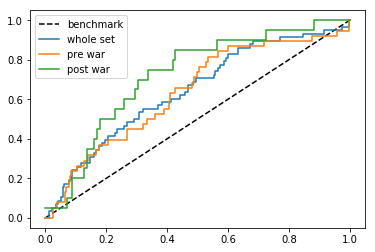

In [94]:
#logistic with whole data set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def in_sample_logistic(training, sign, credit=False):
    if credit is True:
        X = training[['lag_2', 'credit']]
    else:
         X = training[['lag_2']]
    y = training['crisisST']
    logis = LogisticRegression()
    logis.fit(X, sign * y)
    pre_pro = logis.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pre_pro)
    auc = roc_auc_score(y, pre_pro)

    print(auc)
    return fpr, tpr, auc

data_fpr, data_tpr, _ = in_sample_logistic(data, -1)
in_sample_logistic(data, -1, True)

pre_fpr, pre_tpr, _ = in_sample_logistic(preW, -1)
in_sample_logistic(preW, -1, True)

in_sample_logistic(postW, 1)
post_fpr, post_tpr, _ = in_sample_logistic(postW, 1, True)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(data_fpr,data_tpr)
plt.plot(pre_fpr,pre_tpr)
plt.plot(post_fpr,post_tpr)
plt.legend(['benchmark', 'whole set', 'pre war', 'post war'])

0.6895470383275262
0.5372822299651567
0.7043413173652695
0.7178143712574849
0.6987704918032787
0.8169398907103825


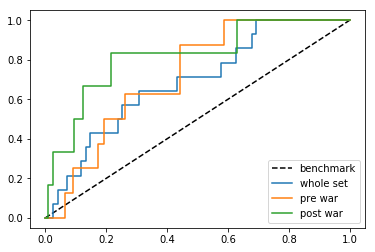

In [92]:
def out_of_sample_logistic(whole, test, sign, credit=False):
    if credit is True:
        X = whole[['lag_2', 'credit']]
    else:
         X = whole[['lag_2']]
    y = whole['crisisST']
    
    trainSize = int(whole.shape[0]*(1-test))
    X_train = X[:trainSize]
    X_test = X[trainSize:]
    y_train = y[:trainSize]
    y_test = y[trainSize:]
    
    logis = LogisticRegression()
    logis.fit(X_train, sign * y_train)
    pre_pro = logis.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, pre_pro)
    auc = roc_auc_score(y_test, pre_pro)

    print(auc)
    return fpr, tpr, auc
    
whole_fpr, whole_tpr, _ = out_of_sample_logistic(data, 0.3, -1)
out_of_sample_logistic(data, 0.3, -1, True)

out_of_sample_logistic(preW, 0.3, -1)
preW_fpr, preW_tpr, _ = out_of_sample_logistic(preW, 0.3, -1, True)

out_of_sample_logistic(postW, 0.3, 1)
postW_fpr, postW_tpr, _ = out_of_sample_logistic(postW, 0.3, 1, True)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(whole_fpr,whole_tpr)
plt.plot(preW_fpr,preW_tpr)
plt.plot(postW_fpr,postW_tpr)
plt.legend(['benchmark', 'whole set', 'pre war', 'post war'])

In [96]:
total = 0.0
for i in range(2, 6):
    wholeSet = data[:int(data.shape[0]*(i/5.0))]
    _, _, auc = out_of_sample_logistic(wholeSet, (1.0/i), -1)
    total += auc

avg = total/4
avg


0.5767590618336886
0.6833259619637329
0.6280080213903744
0.6838235294117647


0.6429791436498902